In [282]:
#RANDOM FOREST, LINEAR REGRESSION,K MEANS ALGORITHM(Unsupervised) ON insurance.csv

In [5]:
#This code uses 'insurance.csv' which has taken from Kaggle.


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [6]:
#RANDOM FOREST

In [7]:
#Importing dataset
medical_insurance_dataset = pd.read_csv('insurance.csv')
medical_insurance_dataset.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [8]:
medical_insurance_dataset.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [9]:
medical_insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:>

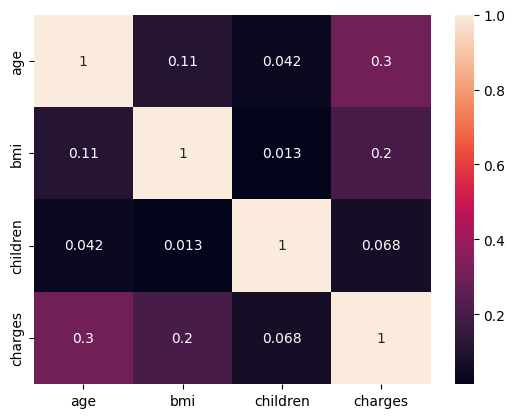

In [10]:
sns.heatmap(medical_insurance_dataset.corr(), annot=True)

In [11]:
#X and y
X_insurance = medical_insurance_dataset.iloc[:,0:6].values
X_insurance

array([[19, 'female', 27.9, 0, 'yes', 'southwest'],
       [18, 'male', 33.77, 1, 'no', 'southeast'],
       [28, 'male', 33.0, 3, 'no', 'southeast'],
       ...,
       [18, 'female', 36.85, 0, 'no', 'southeast'],
       [21, 'female', 25.8, 0, 'no', 'southwest'],
       [61, 'female', 29.07, 0, 'yes', 'northwest']], dtype=object)

In [12]:
y_insurance = medical_insurance_dataset.iloc[:,6].values
y_insurance

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [14]:
#Encoding Labels
from sklearn.preprocessing import LabelEncoder

In [15]:
label_encoder_sex = LabelEncoder()
label_encoder_smoker = LabelEncoder()
label_encoder_region = LabelEncoder()

In [16]:
X_insurance[:,1] = label_encoder_sex.fit_transform(X_insurance[:,1])
X_insurance[:,4] = label_encoder_smoker.fit_transform(X_insurance[:,4])
X_insurance[:,5] = label_encoder_region.fit_transform(X_insurance[:,5])

X_insurance

array([[19, 0, 27.9, 0, 1, 3],
       [18, 1, 33.77, 1, 0, 2],
       [28, 1, 33.0, 3, 0, 2],
       ...,
       [18, 0, 36.85, 0, 0, 2],
       [21, 0, 25.8, 0, 0, 3],
       [61, 0, 29.07, 0, 1, 1]], dtype=object)

In [17]:
#Train and Test
from sklearn.model_selection import train_test_split

In [18]:
X_insurance_train, X_insurance_test, y_insurance_train, y_insurance_test = train_test_split(X_insurance, y_insurance, test_size = 0.25, random_state = 0)

In [19]:
X_insurance_train.shape,  y_insurance_train.shape

((1003, 6), (1003,))

In [20]:
X_insurance_test.shape,  y_insurance_test.shape

((335, 6), (335,))

In [21]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [22]:
insurance_rd_regressor = RandomForestRegressor(n_estimators=100)

In [23]:
insurance_rd_regressor.fit(X_insurance_train,y_insurance_train)

RandomForestRegressor()

In [24]:
insurance_rd_regressor.score(X_insurance_train,y_insurance_train)

0.974863017872274

In [25]:
insurance_rd_regressor.score(X_insurance_test,y_insurance_test)

0.8742006004373697

In [26]:
insurance_rd_regressor.score(X_insurance_test,y_insurance_test)

0.8742006004373697

In [27]:
predictions = insurance_rd_regressor.predict(X_insurance_test)

In [28]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_insurance_test, predictions)

2708.0112938269644

In [29]:
#LINEAR REGRESSION

In [30]:
#Importing the basic librarires


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px

In [31]:
#Importing the dataset
df =pd.read_csv("insurance.csv")

In [32]:
# look the data set
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [33]:
# looking the shape DataSet
df.shape

(1338, 7)

In [34]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [35]:
#checking null value 
#no NULL values in the dataset
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [36]:
# look  describe data set
df.describe().round(2)

age      bmi  children   charges
count  1338.00  1338.00   1338.00   1338.00
mean     39.21    30.66      1.09  13270.42
std      14.05     6.10      1.21  12110.01
min      18.00    15.96      0.00   1121.87
25%      27.00    26.30      0.00   4740.29
50%      39.00    30.40      1.00   9382.03
75%      51.00    34.69      2.00  16639.91
max      64.00    53.13      5.00  63770.43

In [37]:
# How much the percentage - Gender at the dataset
df["sex"].value_counts(normalize=True)

male      0.505232
female    0.494768
Name: sex, dtype: float64

In [38]:
# How much the percentage - Smoker at the dataset
df["smoker"].value_counts(normalize=True)

no     0.795217
yes    0.204783
Name: smoker, dtype: float64

In [39]:
# How much the percentage - region at the dataset
df["region"].value_counts(normalize=True)

southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: region, dtype: float64

In [40]:
px.scatter(df,x="age",y="charges",color="sex",animation_frame="smoker",size="children")
#Here can see the values Body mass in the Male higher than the female

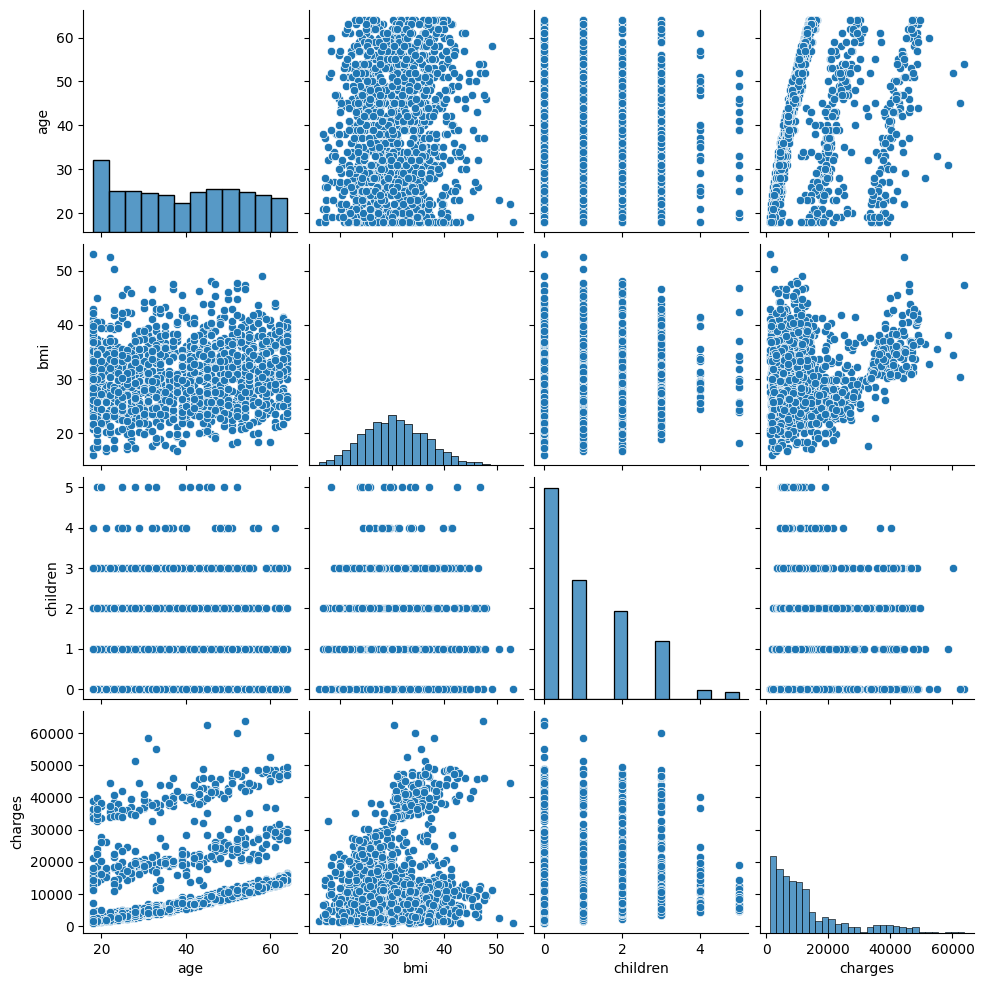

In [41]:
sns.pairplot(df)

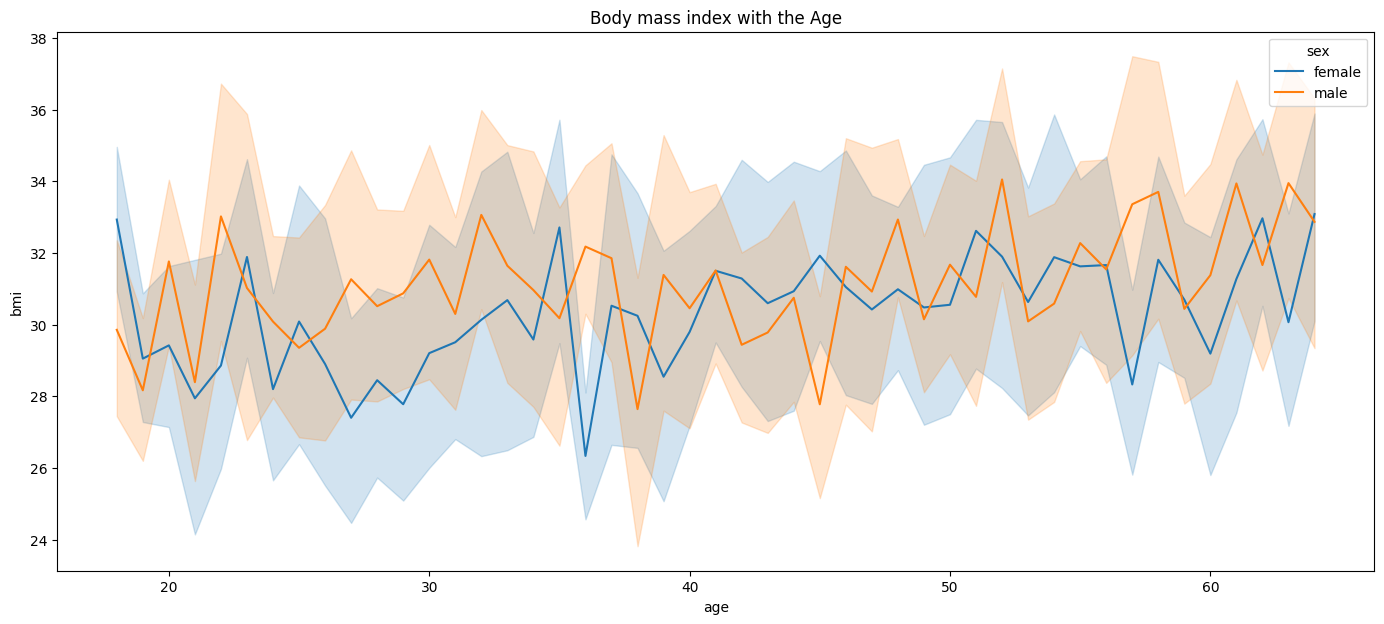

In [42]:
plt.figure(figsize=(17,7))
sns.lineplot(data=df,x="age",y="bmi",hue="sex")
plt.title("Body mass index with the Age")
plt.show()

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

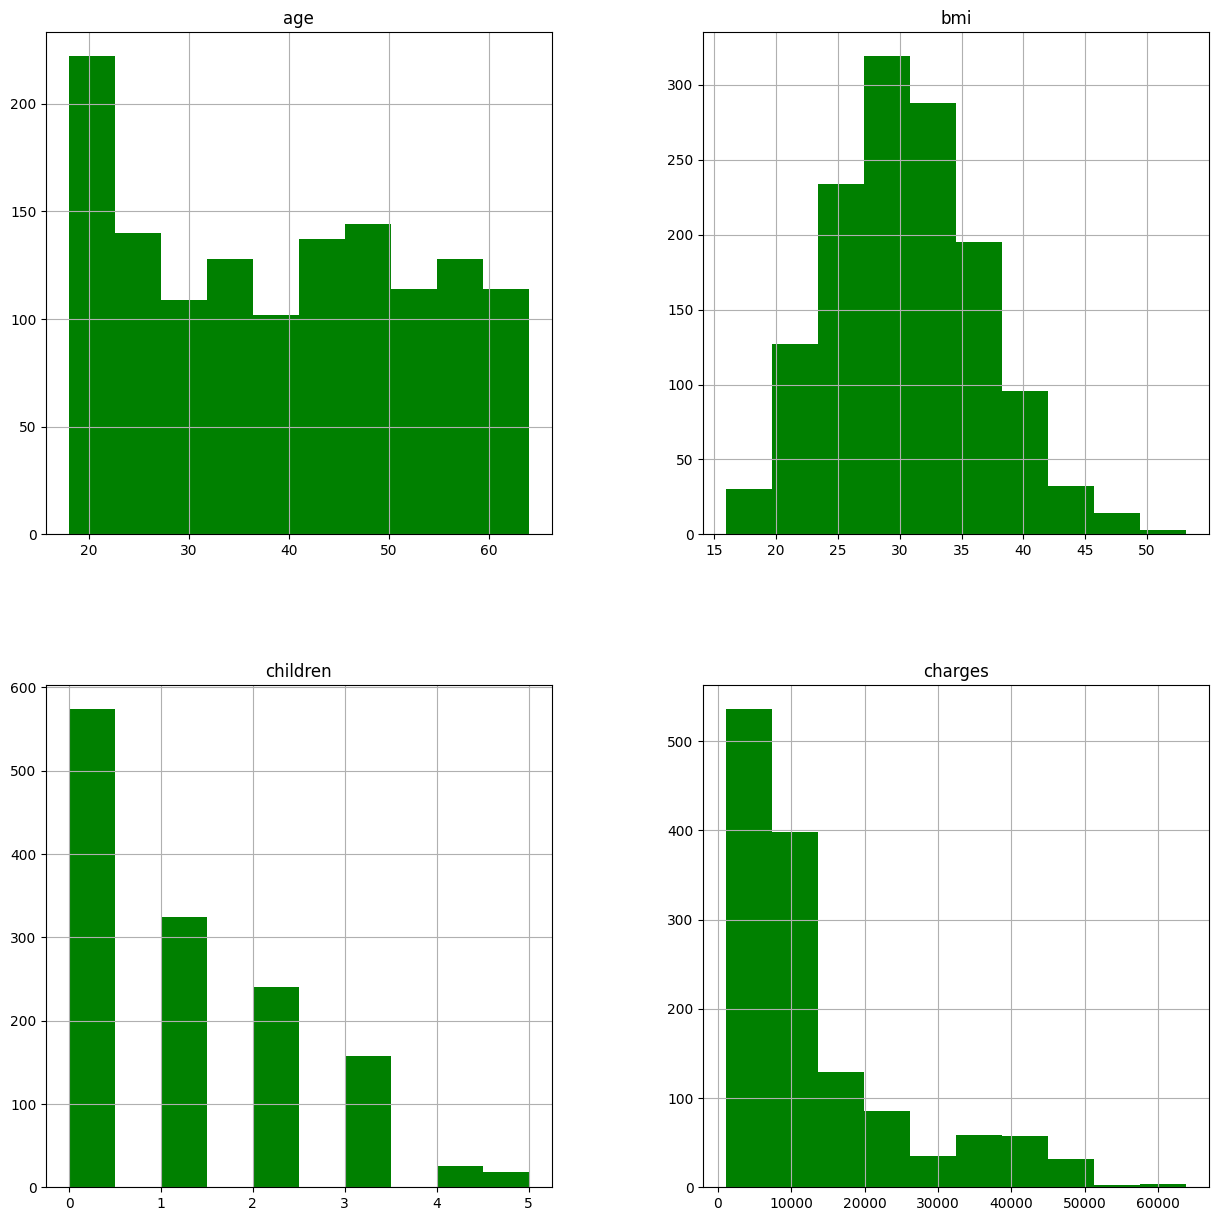

In [43]:
# Data Visualization with histogram 
df[['age',  'bmi', 'children', 'charges']].hist(bins=10, figsize=(15,15),color='green')

In [44]:
df.groupby("region")["charges"].sum().round(2)

region
northeast    4343668.58
northwest    4035712.00
southeast    5363689.76
southwest    4012754.65
Name: charges, dtype: float64

In [45]:
# let making group by
display(df.groupby(["sex","smoker","region"])["charges"].mean().round(2))

sex     smoker  region   
female  no      northeast     9640.43
                northwest     8787.00
                southeast     8440.21
                southwest     8234.09
        yes     northeast    28032.05
                northwest    29670.82
                southeast    33034.82
                southwest    31687.99
male    no      northeast     8664.04
                northwest     8320.69
                southeast     7609.00
                southwest     7778.91
        yes     northeast    30926.25
                northwest    30713.18
                southeast    36029.84
                southwest    32598.86
Name: charges, dtype: float64

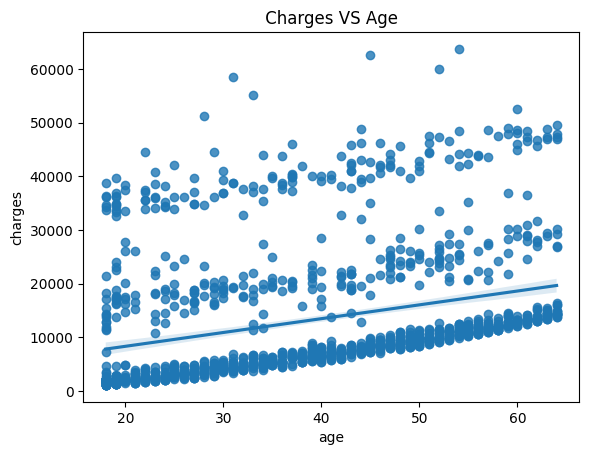

In [46]:
#Modelling
sns.regplot(x='age', y='charges', data=df)
plt.title(' Charges VS Age ')
plt.show()

In [47]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [48]:
sex=pd.get_dummies(df["sex"],drop_first=True)

In [49]:
smoker=pd.get_dummies(df["smoker"],drop_first=True)
region=pd.get_dummies(df["region"],drop_first=True)

In [50]:
# make concat
df["Smoker"]=smoker

In [51]:
df["Sex"]=sex

In [52]:
df.head()

age     sex     bmi  children smoker     region      charges  Smoker  Sex
0   19  female  27.900         0    yes  southwest  16884.92400       1    0
1   18    male  33.770         1     no  southeast   1725.55230       0    1
2   28    male  33.000         3     no  southeast   4449.46200       0    1
3   33    male  22.705         0     no  northwest  21984.47061       0    1
4   32    male  28.880         0     no  northwest   3866.85520       0    1

In [53]:
df_new =df.drop(columns=["sex","region","smoker"])
df_new.head()

age     bmi  children      charges  Smoker  Sex
0   19  27.900         0  16884.92400       1    0
1   18  33.770         1   1725.55230       0    1
2   28  33.000         3   4449.46200       0    1
3   33  22.705         0  21984.47061       0    1
4   32  28.880         0   3866.85520       0    1

In [54]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   charges   1338 non-null   float64
 4   Smoker    1338 non-null   uint8  
 5   Sex       1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(2)
memory usage: 44.6 KB


<AxesSubplot:>

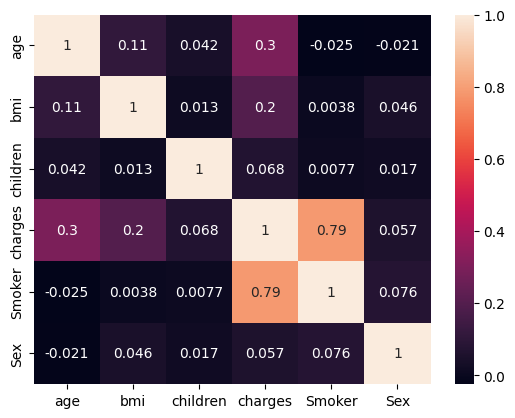

In [55]:
sns.heatmap(df_new.corr(),annot=True)

In [56]:
#Defined X value and y value 

X = df_new.drop(['charges'],axis=1)
y = df_new.charges

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=40)

In [57]:
print("X Train : ", X_train.shape)
print("X Test : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test : ", y_test.shape)

X Train :  (1003, 5)
X Test :  (335, 5)
Y Train :  (1003,)
Y Test :  (335,)


In [58]:
#Linear regression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [59]:
y_pred=model.predict(X_test)
y_pred

array([ 5777.84852442, 28378.56162864, 11507.26126214, 12199.14395411,
       24343.6315973 ,  6900.08017276, 14197.13710647, 30008.44250207,
       12170.51417607, 31605.96437715, 33471.9880474 , 12113.25226202,
       14028.12704259, 10957.96298219, 13122.90671155,  6682.71593547,
        6531.61379489, 38429.84641032, 35234.38882123,  7806.8977214 ,
       12596.7979659 ,  2187.34361764,  5857.68948865, 32661.92328014,
       14220.68903043, 25479.62067211, 14486.89841668,  2022.41209063,
        7122.42238453,  9246.09907765, 30281.81832792,  9080.57496063,
       31631.53214004, 36305.92349131, 23017.83209879,   501.59907324,
       14372.67284823, 10645.42981078,  9600.16366392, 16830.67128228,
        8043.45641784, 13042.55953286,  8519.65116182,  7554.92648087,
        1283.39645211,  9792.0171566 ,  3252.70991986, 27582.34079712,
        6213.51500491, 10076.23755683, 14409.22294383, 25386.11521282,
        8584.04415821, 11207.20939926,  9098.63791326,   726.21642292,
      

In [60]:
y_train

404      3260.19900
801     14313.84630
436      2254.79670
335     13822.80300
644     18806.14547
           ...     
1330    12629.16560
1016     2709.24395
165     10407.08585
7        7281.50560
219     25081.76784
Name: charges, Length: 1003, dtype: float64

In [61]:
mean_absolute_error(y_test,y_pred)

4285.429160989958

In [62]:
model.score(X,y)

0.7495761818227272

In [63]:
#K MEANS ALGORITHM


In [64]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import MaxNLocator
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
path="insurance.csv"

In [66]:
raw_data=pd.read_csv(path)
raw_data

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [67]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [68]:
raw_data_c=raw_data.drop(["sex", "smoker", "region"], axis=1).copy() #only continuous variable dataset will be used for plots

In [69]:
raw_data.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [70]:
raw_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Text(0.5, 0, 'Region')

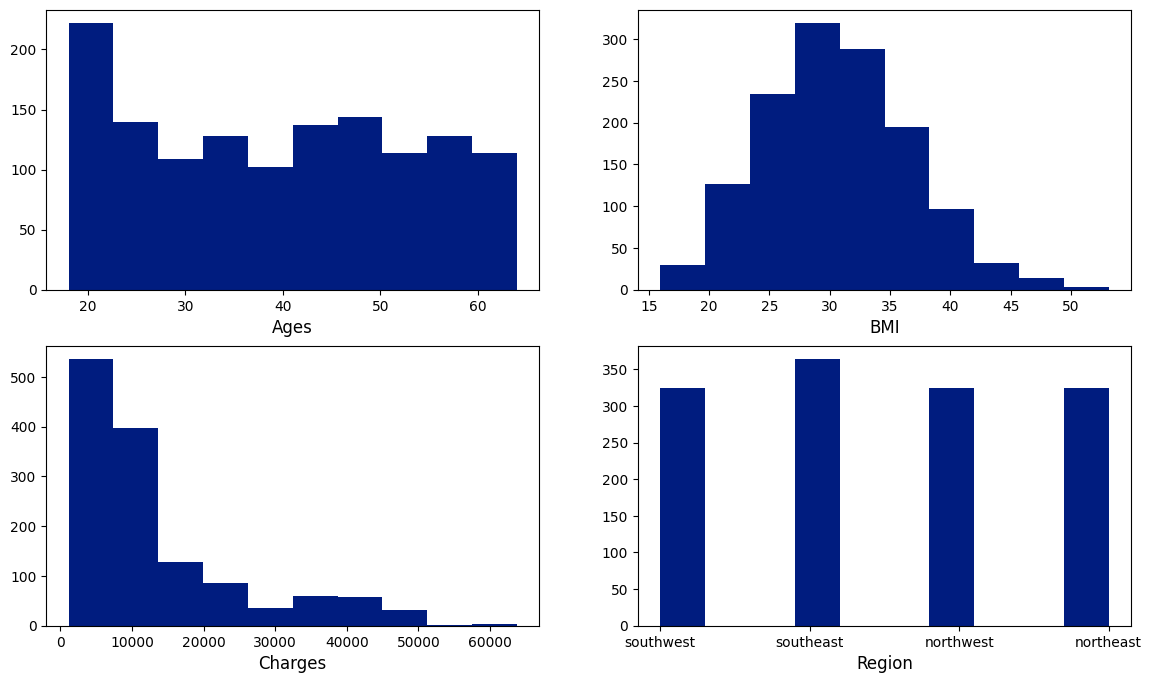

In [71]:
plt.figure(figsize=(14,8))
plt.style.use("seaborn-dark-palette")
plt.subplot(2,2,1)
plt.hist(raw_data["age"])
plt.xlabel("Ages", fontsize=12)
plt.subplot(2,2,2)
plt.hist(raw_data["bmi"])
plt.xlabel("BMI", fontsize=12)
plt.subplot(2,2,3)
plt.hist(raw_data["charges"])
plt.xlabel("Charges", fontsize=12)
plt.subplot(2,2,4)
plt.hist(raw_data["region"])
plt.xlabel("Region", fontsize=12)

In [72]:
corr_mat=raw_data_c.corr()
corr_mat

age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000

<AxesSubplot:>

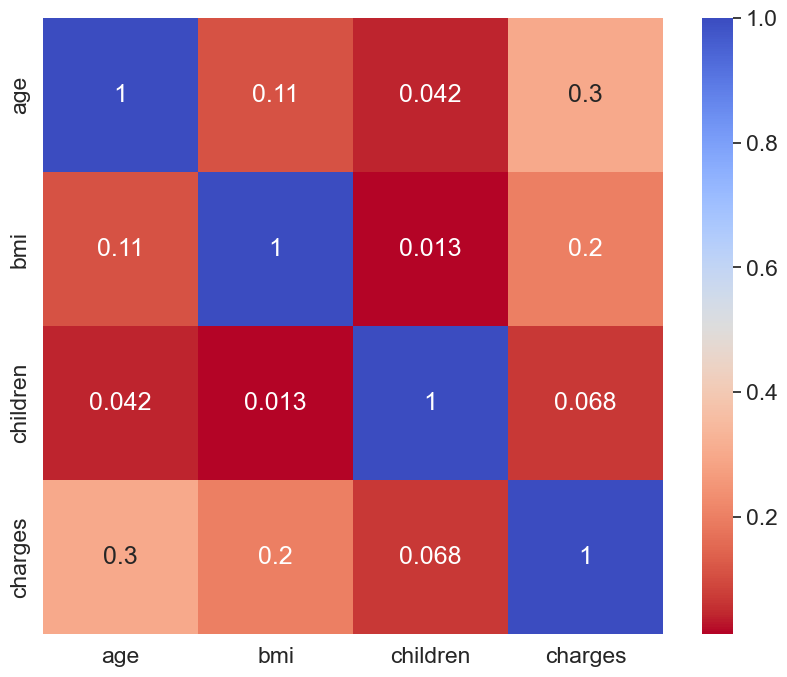

In [73]:
plt.figure(figsize=(10,8))
corar=np.array(corr_mat.values)
sns.set(font_scale=1.5)
sns.heatmap(corr_mat, annot=corar,cmap="coolwarm_r")

In [74]:
raw_data.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [75]:
raw_data.loc[(raw_data.age>17) & (raw_data.age<=30), "age_cat"]="Young Adult"
raw_data.loc[(raw_data.age>30) & (raw_data.age<=59), "age_cat"]="Adult"
raw_data.loc[(raw_data.age>59), "age_cat"]="Old"
raw_data

age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

          age_cat  
0     Young Adult  
1     Young Adult  
2     Young Adult  
3           Adult  
4           Adult  
...           ...  
1333        Adult  
1334  Young Adult  
1335  Young Adult  
1336  Young Adult  
1337          Old  

[1338 rows x 8 columns]

Adult          780
Young Adult    444
Old            114
Name: age_cat, dtype: int64


([<matplotlib.patches.Wedge at 0x2df5b81cc40>,
 [Text(-0.30922189662362254, 1.159474802938162, 'Young Adult'),
  Text(-0.007748139924787676, -1.0999727116286595, 'Adult'),
  Text(1.0608289775377782, -0.29093277645557974, 'Old')],
 [Text(-0.18037943969711315, 0.6763603017139278, '58.3%'),
  Text(-0.004226258140793277, -0.5999851154338142, '33.2%'),
  Text(0.5786339877478789, -0.1586906053394071, '8.5%')])

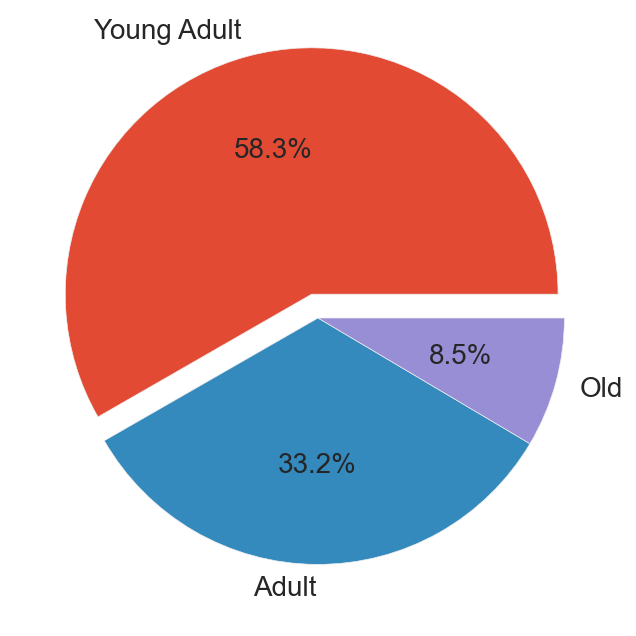

In [76]:
labels=raw_data.age_cat.unique().tolist()
count=raw_data.age_cat.value_counts()
print(count)
count=count.values
plt.style.use("ggplot")
plt.figure(figsize=(8,8))
explode=(0.1,0,0)
plt.pie(count, labels=labels,explode=explode, autopct="%1.1f%%", textprops={'fontsize': 20})

Text(0, 0.5, 'Charges Standard Deviation')

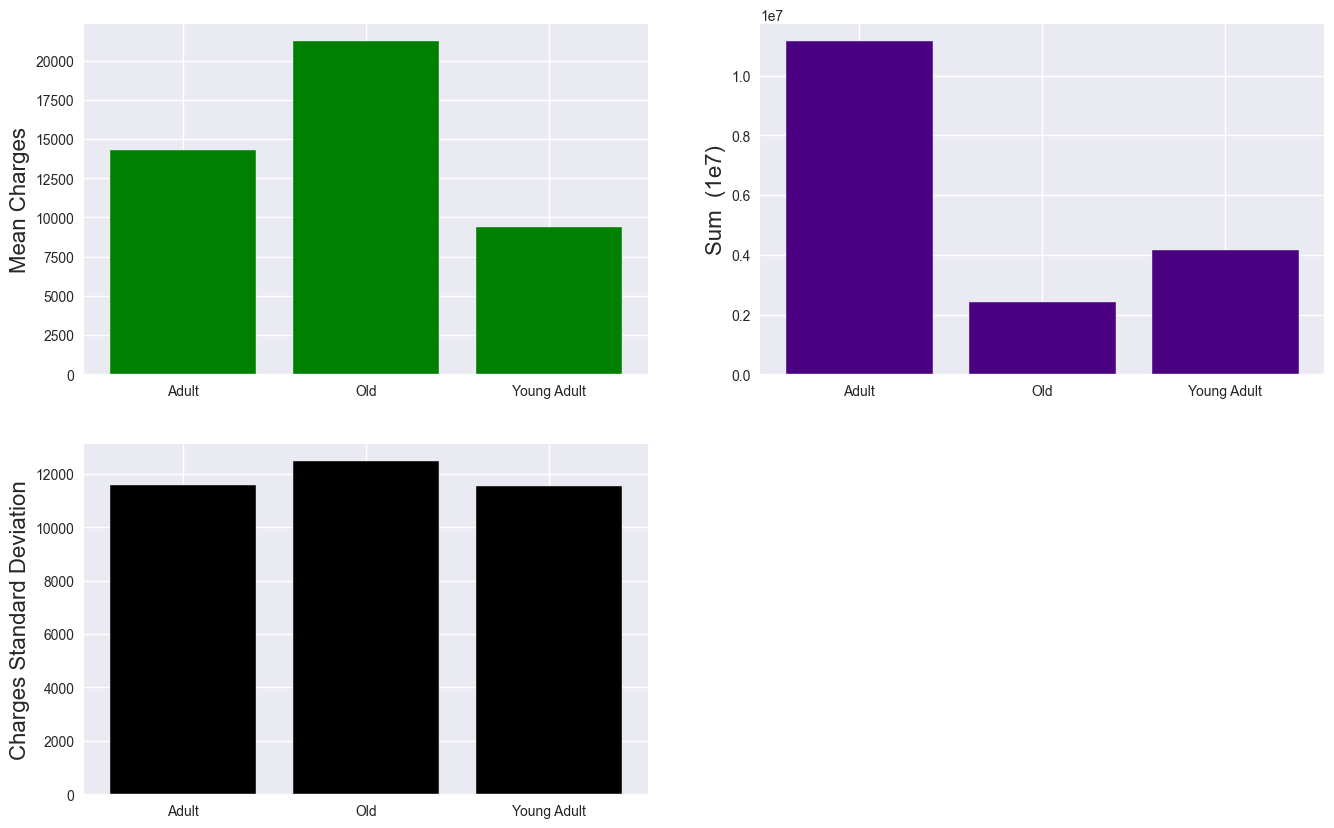

In [77]:
charge_avg_age=raw_data.groupby("age_cat")["charges"].mean()
labels_avg=charge_avg_age.keys()
charge_avg_age=charge_avg_age.tolist()

charge_sum_age=raw_data.groupby(["age_cat"])["charges"].sum()
labels_sum=charge_sum_age.keys()
charge_sum_age=charge_sum_age.tolist()

charge_std_age=raw_data.groupby(["age_cat"])["charges"].std()
labels_std=charge_std_age.keys()
charge_std_age=charge_std_age.tolist()


plt.style.use("seaborn")
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
plt.bar(labels_avg, charge_avg_age, color="green")
plt.ylabel("Mean Charges", fontsize=16)
plt.subplot(2,2,2)
plt.bar(labels_sum, charge_sum_age, color="indigo")
plt.ylabel("Sum  (1e7)", fontsize=16)
plt.subplot(2,2,3)
plt.bar(labels_sum, charge_std_age, color="black")
plt.ylabel("Charges Standard Deviation", fontsize=16)

In [78]:
raw_data["log_charges"]=np.log(raw_data["charges"])
raw_data 

age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

          age_cat  log_charges  
0     Young Adult     9.734176  
1     Young Adult     7.453302  
2     Young Adult     8.400538  
3           Adult     9.998092  
4           Adult     8.260197  
...           ...          ...  
1333        Adult     9.268661  
1334  Young Adult     7.698927  
1335  Young Adult     7.396233  
1336  Young Adult     7.604867  
1337          Old    10.279914  

[1338 rows x 9 columns]

Text(0.5, 0, 'Log of Charges')

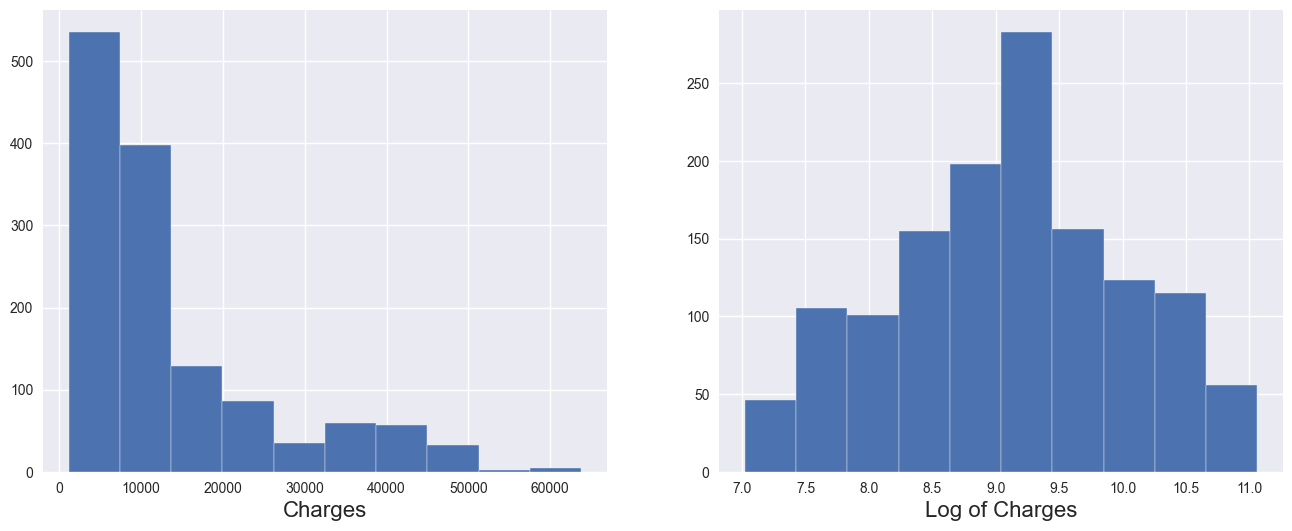

In [79]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
raw_data["charges"].hist()
plt.xlabel("Charges", fontsize=16)


plt.subplot(1,2,2)
raw_data["log_charges"].hist()
plt.xlabel("Log of Charges", fontsize=16)

C:\Users\New User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\New User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='sex', ylabel='log_charges'>

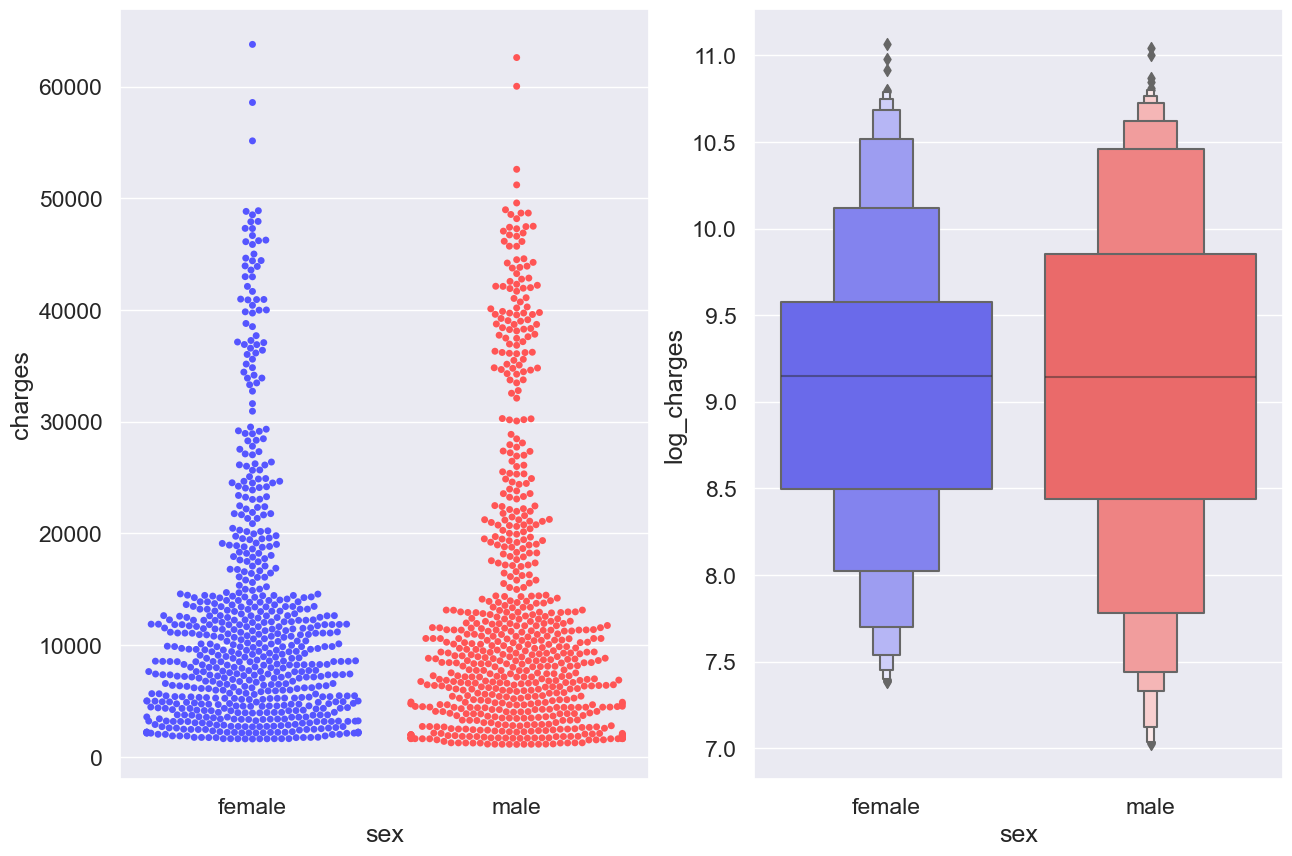

In [80]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
plt.subplot(1,2,1)
sns.swarmplot(raw_data["sex"], raw_data["charges"], palette ="seismic")
plt.subplot(1,2,2)
sns.boxenplot(raw_data["sex"], raw_data["log_charges"], palette ="seismic")

C:\Users\New User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='sex', ylabel='bmi'>

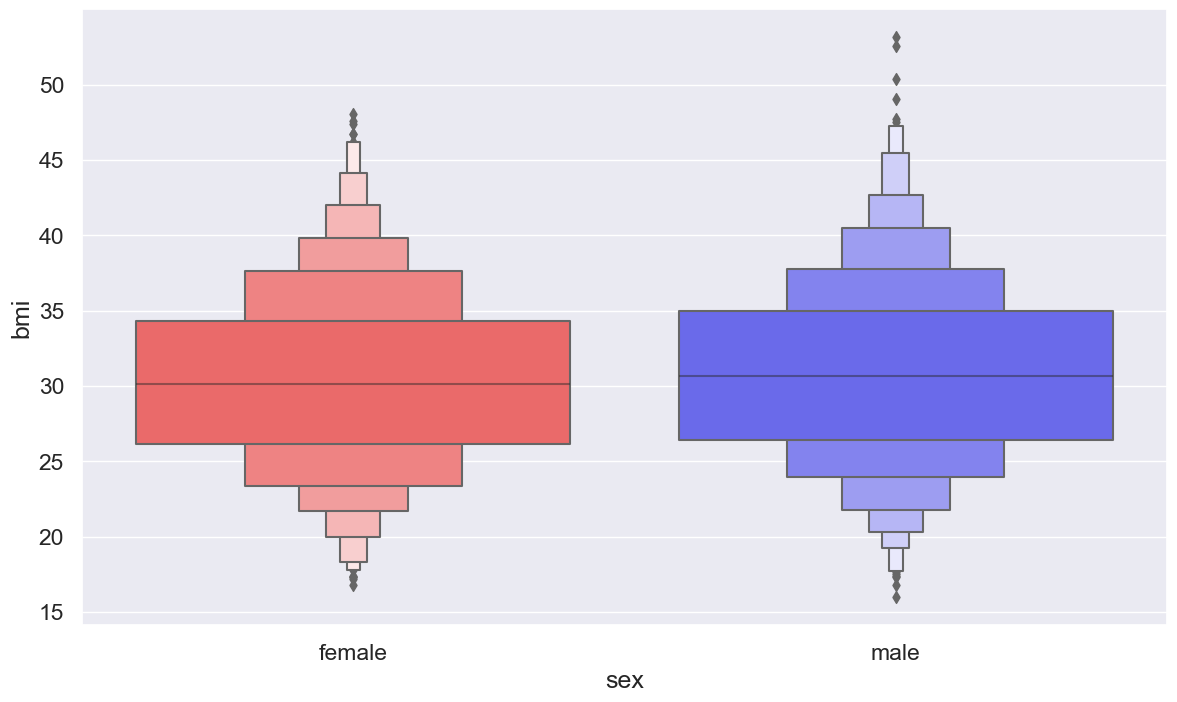

In [81]:
plt.figure(figsize=(14,8))
sns.set(font_scale=1.5)
sns.boxenplot(raw_data["sex"], raw_data["bmi"], palette ="seismic_r")

In [82]:
raw_data.loc[(raw_data.age<19), "bmi_cat"]="Underweight"
raw_data.loc[(raw_data.age>=19) & (raw_data.age<=25), "bmi_cat"]="Normal"
raw_data.loc[(raw_data.age>25) & (raw_data.age<=30), "bmi_cat"]="Overweight"
raw_data.loc[(raw_data.age>30), "bmi_cat"]="Obese"
raw_data

age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

          age_cat  log_charges      bmi_cat  
0     Young Adult     9.734176       Normal  
1     Young Adult     7.453302  Underweight  
2     Young Adult     8.400538   Overweight  
3           Adult     9.998092        Obese  
4           Adult     8.260197        Obese  
...           ...          ...          ...  
1333        Adult     9.268661        Obese  
1334  Young Adult     7.698927  Underweight  
1335  Young Adult     7.396233  Underweight  
1336  Young Adult     7.604867       Normal  
1337          Old    10.279914        Obese  

[1338 rows x 10 columns]

Text(0, 0.5, 'Count')

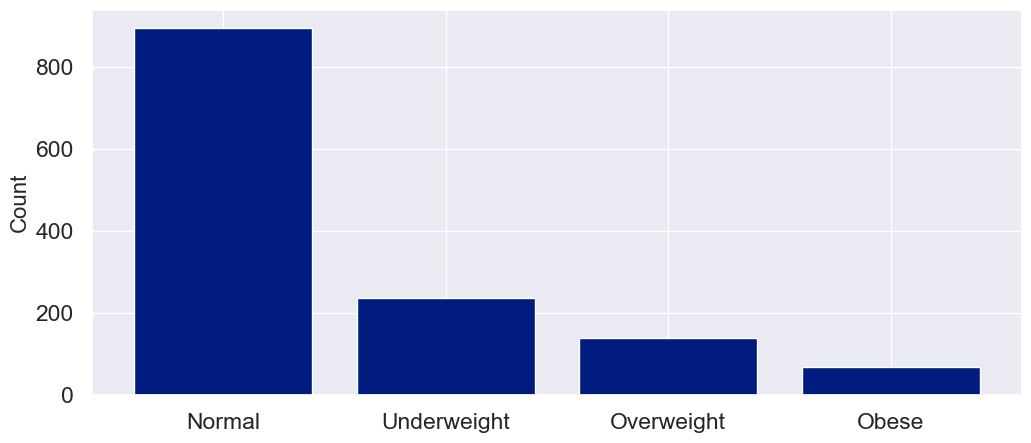

In [83]:
bmi_val=raw_data["bmi_cat"].value_counts()
bmi_val=bmi_val.tolist()
plt.style.use("seaborn-dark-palette")
labels=raw_data["bmi_cat"].unique()
plt.figure(figsize=(12,5))
plt.bar(labels, bmi_val)
plt.ylabel("Count", fontsize=16)

Text(0, 0.5, 'Count')

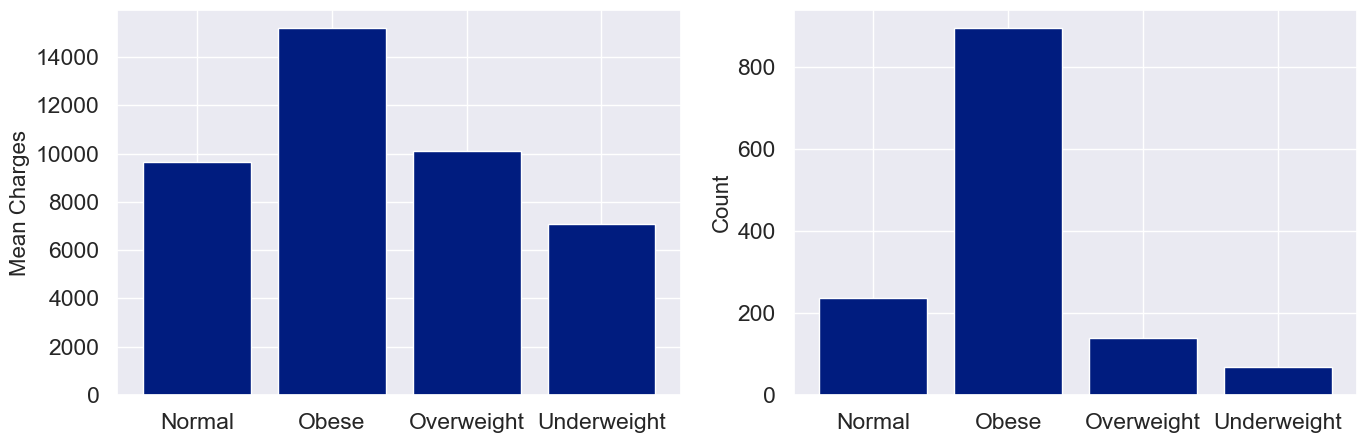

In [84]:
bmi_avg_charge=raw_data.groupby("bmi_cat")["charges"].mean()
labels_a=bmi_avg_charge.keys()
bmi_avg_charge=bmi_avg_charge.tolist()

bmi_count_charge=raw_data.groupby("bmi_cat")["charges"].count()
labels_c=bmi_count_charge.keys()
bmi_count_charge=bmi_count_charge.tolist()


plt.style.use("seaborn-dark-palette")
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.bar(labels_a, bmi_avg_charge)
plt.ylabel("Mean Charges", fontsize=16)

plt.subplot(1,2,2)
plt.bar(labels_c, bmi_count_charge)
plt.ylabel("Count", fontsize=16)

C:\Users\New User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\New User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



<AxesSubplot:xlabel='smoker', ylabel='charges'>

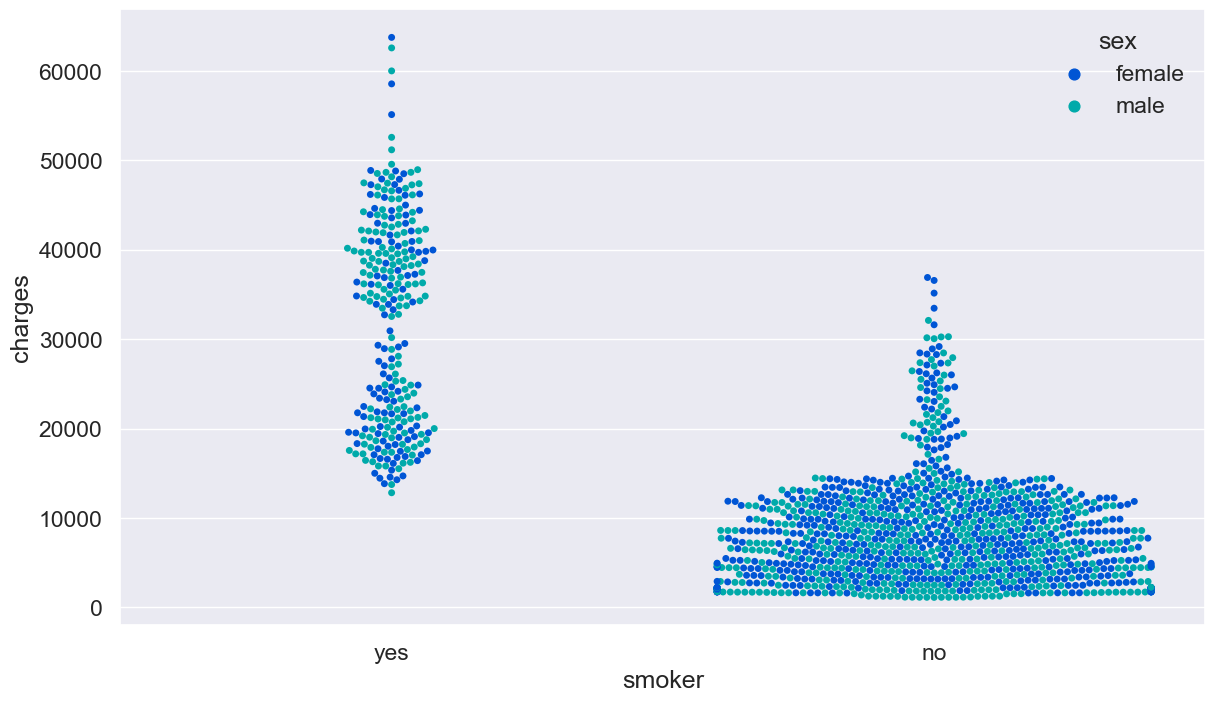

In [85]:
plt.figure(figsize=(14,8))
sns.set(font_scale=1.5)
sns.swarmplot(raw_data["smoker"], raw_data["charges"],hue=raw_data["sex"], palette="winter")

bmi_cat        Normal         Obese    Overweight   Underweight
smoker                                                         
no        4248.268569  10373.029092   5485.185211   3215.162259
yes      28490.498279  34450.257426  26649.542370  25473.730221


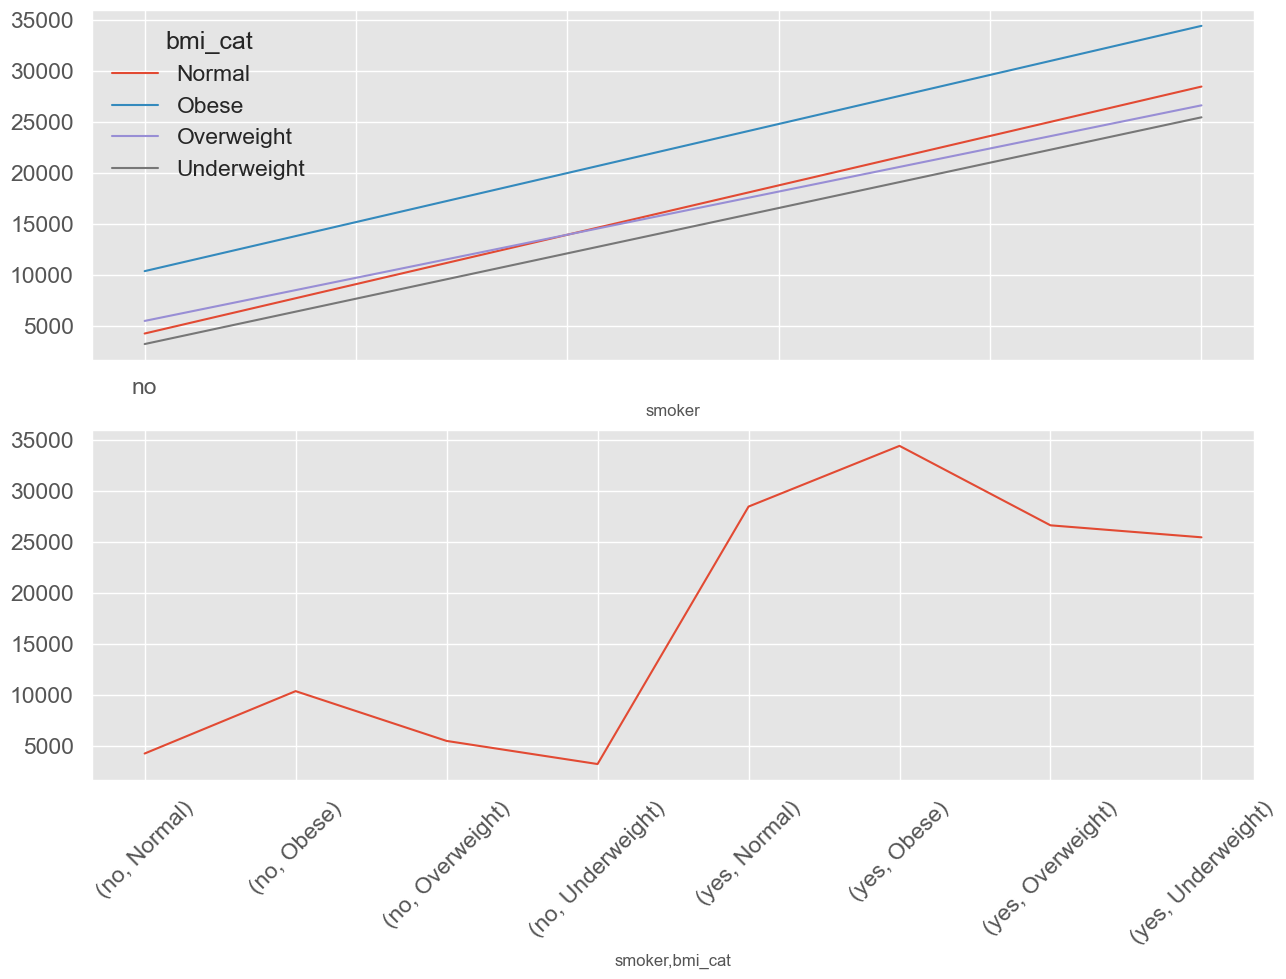

In [86]:
plt.figure(figsize=(15,10))
plt.style.use("ggplot")
ax=plt.subplot(2,1,1)
smk_bmi=raw_data.groupby(["smoker", "bmi_cat"])["charges"].mean().unstack()
print(smk_bmi)
smk_bmi.plot(ax=ax)

ax=plt.subplot(2,1,2)
smk_bmi=raw_data.groupby(["smoker", "bmi_cat"])["charges"].mean().plot(ax=ax)
ax.tick_params('x',labelrotation=45)

In [87]:
raw_data_c

age     bmi  children      charges
0      19  27.900         0  16884.92400
1      18  33.770         1   1725.55230
2      28  33.000         3   4449.46200
3      33  22.705         0  21984.47061
4      32  28.880         0   3866.85520
...   ...     ...       ...          ...
1333   50  30.970         3  10600.54830
1334   18  31.920         0   2205.98080
1335   18  36.850         0   1629.83350
1336   21  25.800         0   2007.94500
1337   61  29.070         0  29141.36030

[1338 rows x 4 columns]

In [88]:
std_scl=StandardScaler()
raw_data_std=std_scl.fit_transform(raw_data_c)
print("columns as age, bmi. children, charges")
print(raw_data_std)

columns as age, bmi. children, charges
[[-1.43876426 -0.45332    -0.90861367  0.2985838 ]
 [-1.50996545  0.5096211  -0.07876719 -0.95368917]
 [-0.79795355  0.38330685  1.58092576 -0.72867467]
 ...
 [-1.50996545  1.0148781  -0.90861367 -0.96159623]
 [-1.29636188 -0.79781341 -0.90861367 -0.93036151]
 [ 1.55168573 -0.26138796 -0.90861367  1.31105347]]


In [89]:
bmi_charg_c=raw_data_std[:,[1,3]]
print(bmi_charg_c)
print(bmi_charg_c.shape)

[[-0.45332     0.2985838 ]
 [ 0.5096211  -0.95368917]
 [ 0.38330685 -0.72867467]
 ...
 [ 1.0148781  -0.96159623]
 [-0.79781341 -0.93036151]
 [-0.26138796  1.31105347]]
(1338, 2)


In [90]:
#To find the best number of cluster (n_clusters=k) we run a for-loop and compute the WSS (Within sum of squares) Elbow method and Silhoutte scores for each "k".
wss=[]
sil=[]
for k in range(2,16):
    kmeans=KMeans(n_clusters=k, random_state=1).fit(bmi_charg_c)
    wss.append(kmeans.inertia_)
    labels=kmeans.labels_
    silhoutte=silhouette_score(bmi_charg_c, labels, metric = 'euclidean')
    sil.append(silhoutte)

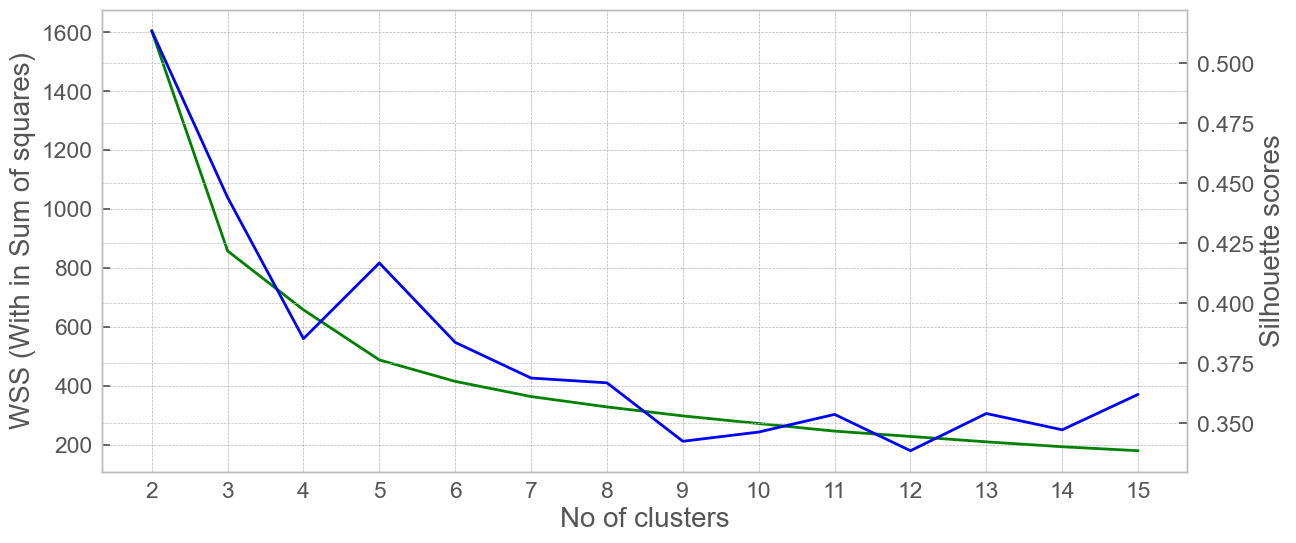

In [91]:
k=range(2,16)
plt.style.use("bmh")
fig,ax=plt.subplots(figsize=(14,6))
ax.set_facecolor("white")
ax.plot(k, wss, color="green")
ax.xaxis.set_major_locator(MaxNLocator(nbins=15, integer=True))
ax.set_xlabel("No of clusters", fontsize=20)
ax.set_ylabel("WSS (With in Sum of squares)", fontsize=20)
ax2=ax.twinx()
ax2.plot(k, sil, color="blue")
ax2.set_ylabel("Silhouette scores", fontsize=20)
ax2.grid(True,color="silver")
plt.show()
#From the plot we see the "elbow" at 3 and silhouutee score almost best at that point.

In [92]:
k=3
kmeans=KMeans(n_clusters=k, random_state=1).fit(bmi_charg_c)
clusters=kmeans.labels_
centrids=kmeans.cluster_centers_
raw_data["clusters"]=clusters
raw_data

age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

          age_cat  log_charges      bmi_cat  clusters  
0     Young Adult     9.734176       Normal         0  
1     Young Adult     7.453302  Underweight         2  
2     Young Adult     8.400538   Overweight         2  
3           Adult     9.998092        Obese         0  
4           Adult     8.260197        Obese         0  
...           ...          ...          ...       ...  
1333        Adult     9.268661        Obese         2  
1334  Young Adult     7.698927  Underweight         2  
1335  Young Adult     7.396233  Underweight         2  
1336  Young Adult     7.604867       Normal         0  
1337          Old    10.279914        Obese         1  

[1338 rows x 11 columns]

In [93]:
raw_data2=raw_data.sort_values(["clusters"]).copy()

In [94]:
for i in range(0,k+1):
    raw_data2["clusters"]=raw_data2["clusters"].replace(i, chr(i+65))
    
raw_data2

age     sex     bmi  children smoker     region      charges  \
0     19  female  27.900         0    yes  southwest  16884.92400   
990   26  female  19.800         1     no  southwest   3378.91000   
989   24  female  20.520         0    yes  northeast  14571.89080   
986   43    male  30.115         3     no  northwest   8410.04685   
985   44  female  25.800         1     no  southwest   7624.63000   
..   ...     ...     ...       ...    ...        ...          ...   
525   18  female  33.880         0     no  southeast  11482.63485   
528   46    male  39.425         1     no  northeast   8342.90875   
531   62  female  31.730         0     no  northeast  14043.47670   
510   56    male  32.110         1     no  northeast  11763.00090   
392   48    male  31.445         1     no  northeast   8964.06055   

         age_cat  log_charges      bmi_cat clusters  
0    Young Adult     9.734176       Normal        A  
990  Young Adult     8.125308   Overweight        A  
989  Young Adult     9.586850       Normal        A  
986        Adult     9.037182        Obese        A  
985        Adult     8.939139        Obese        A  
..           ...          ...          ...      ...  
525  Young Adult     9.348591  Underweight        C  
528        Adult     9.029167        Obese        C  
531          Old     9.549913        Obese        C  
510        Adult     9.372714        Obese        C  
392        Adult     9.100979        Obese        C  

[1338 rows x 11 columns]

In [95]:
raw_data2["clusters"].unique()

array(['A', 'B', 'C'], dtype=object)

In [96]:
x=raw_data2.iloc[:,[2,6]].values
print(x.shape)
y=kmeans.fit_predict(x)
print(y.shape)

(1338, 2)
(1338,)


Text(0.5, 1.0, 'Charges depends on BMI??')

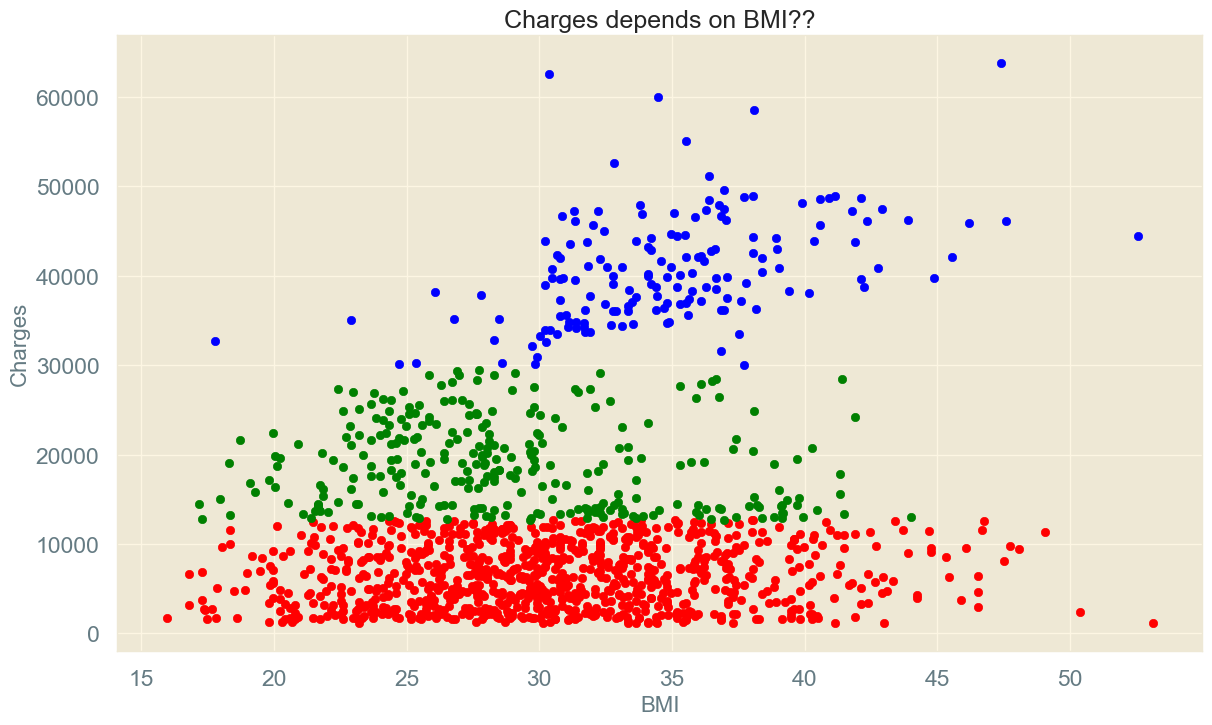

In [97]:
plt.figure(figsize=(14,8))
plt.style.use("Solarize_Light2")
plt.scatter(x[y==0,0], x[y==0,1], color="red", label="A")
plt.scatter(x[y==1,0], x[y==1,1], color="blue", label="B")
plt.scatter(x[y==2,0], x[y==2,1], color="green", label="C")

plt.xlabel("BMI", fontsize=16)
plt.ylabel("Charges", fontsize=16)
plt.title("Charges depends on BMI??", fontsize=18)
#From this, as we have defined we got 3 distinct clusters. With BMI (15 to 35) has a expense of $10,000 to $30,000 where as higher BMI's have much higher cost.

In [98]:
age_charg_c=raw_data_std[:,[0,3]]
print(age_charg_c)
print(age_charg_c.shape)

[[-1.43876426  0.2985838 ]
 [-1.50996545 -0.95368917]
 [-0.79795355 -0.72867467]
 ...
 [-1.50996545 -0.96159623]
 [-1.29636188 -0.93036151]
 [ 1.55168573  1.31105347]]
(1338, 2)


In [99]:
wss=[]
sil=[]
for k in range(2,16):
    kmeans=KMeans(n_clusters=k, random_state=1).fit(age_charg_c)
    wss.append(kmeans.inertia_)
    labels=kmeans.labels_
    silhoutte=silhouette_score(age_charg_c, labels, metric = 'euclidean')
    sil.append(silhoutte)

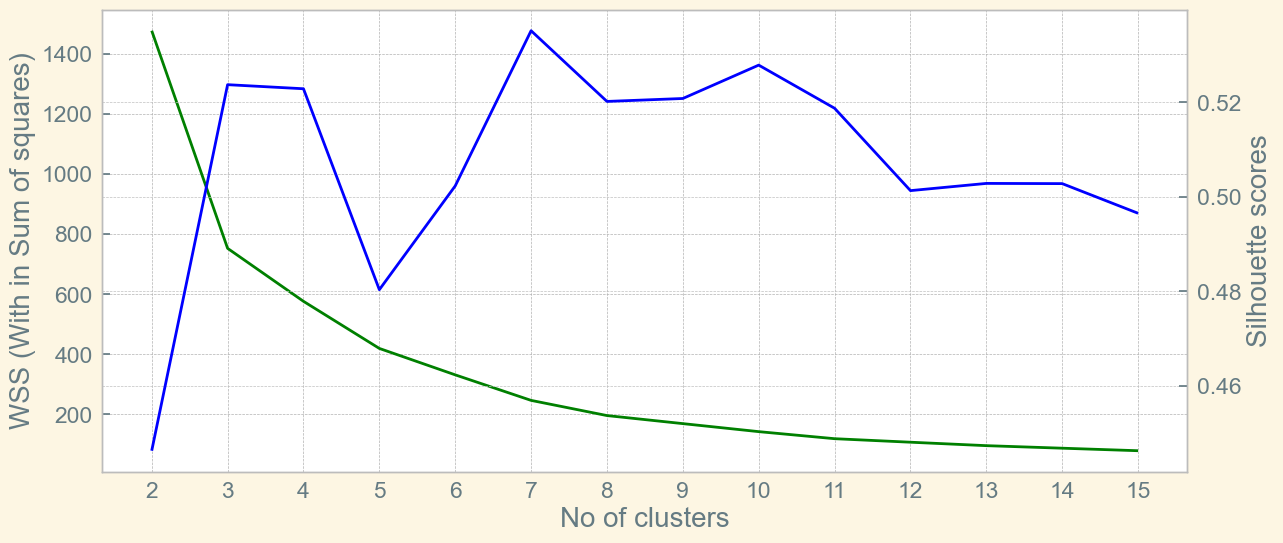

In [100]:
k=range(2,16)
plt.style.use("bmh")
fig,ax=plt.subplots(figsize=(14,6))
ax.set_facecolor("white")
ax.plot(k, wss, color="green")
ax.xaxis.set_major_locator(MaxNLocator(nbins=15, integer=True))
ax.set_xlabel("No of clusters", fontsize=20)
ax.set_ylabel("WSS (With in Sum of squares)", fontsize=20)
ax2=ax.twinx()
ax2.plot(k, sil, color="blue")
ax2.set_ylabel("Silhouette scores", fontsize=20)
ax2.grid(True,color="silver")
plt.show()

In [101]:
k=3
kmeans=KMeans(n_clusters=k, random_state=1).fit(age_charg_c)
clusters=kmeans.labels_
centrids=kmeans.cluster_centers_
raw_data["clusters"]=clusters
raw_data

age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

          age_cat  log_charges      bmi_cat  clusters  
0     Young Adult     9.734176       Normal         1  
1     Young Adult     7.453302  Underweight         1  
2     Young Adult     8.400538   Overweight         1  
3           Adult     9.998092        Obese         1  
4           Adult     8.260197        Obese         1  
...           ...          ...          ...       ...  
1333        Adult     9.268661        Obese         0  
1334  Young Adult     7.698927  Underweight         1  
1335  Young Adult     7.396233  Underweight         1  
1336  Young Adult     7.604867       Normal         1  
1337          Old    10.279914        Obese         0  

[1338 rows x 11 columns]

In [102]:
raw_data2=raw_data.sort_values(["clusters"]).copy()

In [103]:
for i in range(0,k+1):
    raw_data2["clusters"]=raw_data2["clusters"].replace(i, chr(i+65))
    
raw_data2

age     sex     bmi  children smoker     region      charges age_cat  \
1337   61  female  29.070         0    yes  northwest  29141.36030     Old   
1020   51    male  37.000         0     no  southwest   8798.59300   Adult   
489    53    male  31.160         1     no  northwest  10461.97940   Adult   
491    61  female  25.080         0     no  southeast  24513.09126     Old   
1018   54  female  35.815         3     no  northwest  12495.29085   Adult   
...   ...     ...     ...       ...    ...        ...          ...     ...   
621    37    male  34.100         4    yes  southwest  40182.24600   Adult   
252    54    male  34.210         2    yes  southeast  44260.74990   Adult   
251    63  female  32.200         2    yes  southwest  47305.30500     Old   
271    50    male  34.200         2    yes  southwest  42856.83800   Adult   
668    62    male  32.015         0    yes  northeast  45710.20785     Old   

      log_charges bmi_cat clusters  
1337    10.279914   Obese        A  
1020     9.082347   Obese        A  
489      9.255503   Obese        A  
491     10.106963   Obese        A  
1018     9.433107   Obese        A  
...           ...     ...      ...  
621     10.601181   Obese        C  
252     10.697854   Obese        C  
251     10.764378   Obese        C  
271     10.665620   Obese        C  
668     10.730077   Obese        C  

[1338 rows x 11 columns]

In [104]:
x=raw_data2.iloc[:,[0,6]].values
print(x.shape)
y=kmeans.fit_predict(x)
print(y.shape)

(1338, 2)
(1338,)


Text(0.5, 1.0, 'Charges depends on Age??')

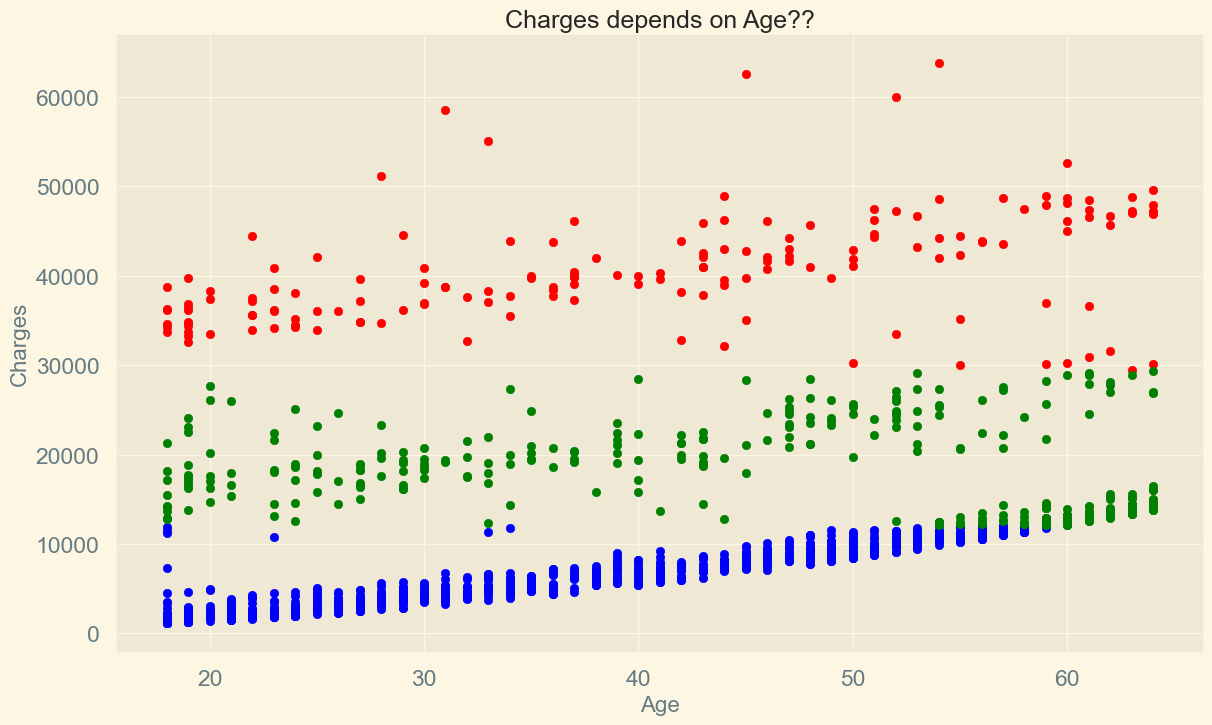

In [105]:
plt.figure(figsize=(14,8))
plt.style.use("Solarize_Light2")
plt.scatter(x[y==0,0], x[y==0,1], color="red", label="A")
plt.scatter(x[y==1,0], x[y==1,1], color="blue", label="B")
plt.scatter(x[y==2,0], x[y==2,1], color="green", label="C")

plt.xlabel("Age", fontsize=16)
plt.ylabel("Charges", fontsize=16)
plt.title("Charges depends on Age??", fontsize=18)

In [106]:
#convert categorical variable "Smoker" as 0 and 1 or a continuous binary variable and run a OLS test
raw_data2["smoker"]=raw_data2["smoker"].replace(["yes", "no"],[1,0])
#Dependent variable: Charges, Independent variable: BMI, age, children and smoker or non-smoker

In [107]:
pval=ols("charges~bmi+age+children+smoker", data=raw_data).fit()
print(pval.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.1
Date:                Wed, 05 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:14:22   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1333   BIC:                         2.714e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -1.21e+04    941.984    -12.848